In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
%matplotlib inline

In [13]:
df = pd.read_csv('~/needledrop/raw-data.csv')

In [ ]:
#plot likes, comments,dislikes, favorites, views, over time
#look at distribution of duration, ratings, genre year over year
#fix ratings info

#regression model, rating ~ likes + views + favorites + duration + genre
#ordered logit model, rating_bucket ~ ...
#decision trees, rating_bucket ~ ...
#svm, rating_bucket ~ ...
#time series, likes/views of video

# Preliminary

In [9]:
df.head()

,altitude,comments,definition,description,dislikes,duration,favorites,id,latitude,likes,live_broadcast,longitude,published_at,tags,thumbnail,title,views,rating
0,0.0,4973,sd,I defend myself against a recent hitjob in The...,614.0,PT21M30S,0,2UZqIIy7pAk,41.603222,35361.0,none,-73.087753,2017-10-07T00:22:24.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/2UZqIIy7pAk/sddefault.jpg,The Fader Response,349152.0,None
1,0.0,976,hd,Listen: https://www.youtube.com/watch?v=6m5du_...,59.0,PT6M8S,0,datrlt_DGLs,41.603222,2261.0,none,-73.087753,2017-10-05T21:42:35.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/datrlt_DGLs/sddefault.jpg,Iglooghost - Neō Wax Bloom ALBUM REVIEW,64350.0,8
2,0.0,920,hd,Young Thug & Carnage - Young Martha EP\nReview...,125.0,PT7M13S,0,uOJW7JwgA6Q,41.603222,2347.0,none,-73.087753,2017-10-04T17:18:48.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/uOJW7JwgA6Q/sddefault.jpg,GREAT ALBUMS: September 2017,106889.0,None
3,0.0,1344,hd,Listen: https://www.youtube.com/watch?v=OL9b_U...,265.0,PT8M11S,0,Uxmi5AcAFgg,41.603222,4119.0,none,-73.087753,2017-10-03T21:15:24.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/Uxmi5AcAFgg/sddefault.jpg,Smokepurpp - Deadstar MIXTAPE REVIEW,140049.0,6
4,0.0,853,hd,Listen: http://www.theneedledrop.com/articles/...,74.0,PT6M27S,0,lI6-C7dwz9k,41.603222,2069.0,none,-73.087753,2017-10-03T16:26:21.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/lI6-C7dwz9k/sddefault.jpg,Injury Reserve - Drive It Like It's Stolen EP ...,86882.0,7


In [4]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 17 columns):
altitude          1388 non-null float64
comments          2424 non-null int64
definition        2424 non-null object
description       2424 non-null object
dislikes          2423 non-null float64
duration          2424 non-null object
favorites         2424 non-null int64
id                2424 non-null object
latitude          1388 non-null float64
likes             2423 non-null float64
live_broadcast    2424 non-null object
longitude         1388 non-null float64
published_at      2424 non-null object
tags              2424 non-null object
thumbnail         2424 non-null object
title             2424 non-null object
views             2415 non-null float64
dtypes: float64(6), int64(2), object(9)
memory usage: 322.0+ KB


altitude          float64
comments            int64
definition         object
description        object
dislikes          float64
duration           object
favorites           int64
id                 object
latitude          float64
likes             float64
live_broadcast     object
longitude         float64
published_at       object
tags               object
thumbnail          object
title              object
views             float64
dtype: object

In [20]:
df.describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,altitude,comments,dislikes,favorites,latitude,likes,longitude,views,rating
count,1388.0,2424.000000,2423.000000,2424.0,1.388000e+03,2423.000000,1.388000e+03,2.415000e+03,1625.000000
mean,0.0,739.205446,232.591003,0.0,4.160322e+01,1881.983079,-7.308775e+01,1.096905e+05,6.352000
std,0.0,1087.556486,822.201271,0.0,1.341629e-07,3537.984524,2.335538e-07,1.582760e+05,1.573068
min,0.0,0.000000,0.000000,0.0,4.160322e+01,33.000000,-7.308775e+01,3.109000e+03,1.000000
25%,NaN,228.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
50%,NaN,412.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
75%,NaN,804.250000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
max,0.0,15588.000000,17720.000000,0.0,4.160322e+01,47392.000000,-7.308775e+01,2.431775e+06,10.000000


In [34]:
df.isnull().sum()

altitude          1036
comments             0
definition           0
description          0
dislikes             1
duration             0
favorites            0
id                   0
latitude          1036
likes                1
live_broadcast       0
longitude         1036
published_at         0
tags                 0
thumbnail            0
title                0
views                9
rating             799
album              514
artist               0
dtype: int64

In [17]:
df['description'] = df['description'].astype('str')

# Processing

In [14]:
#get rating
df['rating'] = None
df['rating'][df['description'].str.contains('1/10', case=False, na=False)] = 1
df['rating'][df['description'].str.contains('2/10', case=False, na=False)] = 2
df['rating'][df['description'].str.contains('3/10', case=False, na=False)] = 3
df['rating'][df['description'].str.contains('4/10', case=False, na=False)] = 4
df['rating'][df['description'].str.contains('5/10', case=False, na=False)] = 5
df['rating'][df['description'].str.contains('6/10', case=False, na=False)] = 6
df['rating'][df['description'].str.contains('7/10', case=False, na=False)] = 7
df['rating'][df['description'].str.contains('8/10', case=False, na=False)] = 8
df['rating'][df['description'].str.contains('9/10', case=False, na=False)] = 9
df['rating'][df['description'].str.contains('10/10', case=False, na=False)] = 10

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [15]:
df['rating'] = pd.to_numeric(df['rating'])

In [27]:
df['title'][df['rating'].isnull()].tail()

2404                           CD SLIP CASE?!!?
2412    Holy Fuck- "Latin America" Track Review
2416                                 Copyright?
2422                      SLIPKNOT TRACK REVIEW
2423                            I saw Sunn O)))
Name: title, dtype: object

In [28]:
#get artist
df.iloc[1].title.split('-')[0]

'Iglooghost '

In [ ]:
#first remove all in

In [16]:
#get album
def test_title(x):
    xx = x.split(' - ')
    if len(xx) > 1:
        return(xx[1])
    
df['album'] = df['title'].apply(test_title)

In [20]:
df['album'] = df.album.str.replace("Review","")
df['album'] = df.album.str.replace("ALBUM REVIEW","")
df['album'] = df.album.str.replace("EP REVIEW","")
df['album'] = df.album.str.replace("MIXTAPE REVIEW","")
df['album'] = df.album.str.replace("REVIEW","")
df['album'] = df.album.str.replace("QUICKIE","")
df['album'] = df.album.str.replace("ALBUM","")
df['album'] = df.album.str.replace("MIXTAPE","")
df['album'] = df.album.str.replace("COMPILATION","")
df['album'] = df.album.str.replace("TRACK","")
df[df['album'].isnull()].head()

,altitude,comments,definition,description,dislikes,duration,favorites,id,latitude,likes,live_broadcast,longitude,published_at,tags,thumbnail,title,views,rating,album
0,0.0,4973,sd,I defend myself against a recent hitjob in The...,614.0,PT21M30S,0,2UZqIIy7pAk,41.603222,35361.0,none,-73.087753,2017-10-07T00:22:24.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/2UZqIIy7pAk/sddefault.jpg,The Fader Response,349152.0,NaN,None
2,0.0,920,hd,Young Thug & Carnage - Young Martha EP\nReview...,125.0,PT7M13S,0,uOJW7JwgA6Q,41.603222,2347.0,none,-73.087753,2017-10-04T17:18:48.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/uOJW7JwgA6Q/sddefault.jpg,GREAT ALBUMS: September 2017,106889.0,NaN,None
5,0.0,1217,hd,The magical monthly segment where I briefly to...,81.0,PT15M43S,0,t3Vdww9zlWY,41.603222,2356.0,none,-73.087753,2017-10-02T15:58:28.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/t3Vdww9zlWY/sddefault.jpg,"YUNOREVIEW: September 2017 (Prophets of Rage, ...",98583.0,NaN,None
6,0.0,680,hd,TND tour dates and tix: http://www.theneedledr...,53.0,PT16M40S,0,B5lZ7M3Qkdk,41.603222,2349.0,none,-73.087753,2017-10-02T01:21:11.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/B5lZ7M3Qkdk/sddefault.jpg,Best & Worst Tracks: 10/1 (Rich The Kid ft. Ke...,138819.0,7.0,None
14,0.0,1273,hd,Today I'm talking about how memetic humor has ...,161.0,PT9M10S,0,dODwQFcIoKE,41.603222,10332.0,none,-73.087753,2017-09-25T17:47:31.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/dODwQFcIoKE/sddefault.jpg,Memes Are the Future of Music Promotion,194705.0,NaN,None


In [22]:
df.album.head()

0                          None
1                Neō Wax Bloom 
2                          None
3                     Deadstar 
4    Drive It Like It's Stolen 
Name: album, dtype: object

In [23]:
#get artist
df['artist'] = df['title'].apply(lambda x: x.split(' - ')[0])

df['artist'].head()

0              The Fader Response
1                      Iglooghost
2    GREAT ALBUMS: September 2017
3                      Smokepurpp
4                  Injury Reserve
Name: artist, dtype: object

In [67]:
df.iloc[1930].artist

'Godspeed You! Black Emperor'

In [68]:
df.iloc[1903].tags
#df.iloc[1].genre

"['after the smoke', 'oiam', 'one in a million', 'yelawolf', 'ep', 'white girls', 'velvet cake', 'far from a bitch', 'universal', 'copyright', 'steal', 'music', 'beat', 'instrumental', 'pipa', 'sopa', 'universal music group', 'umg', 'the needle drop', 'anthony fantano']"

In [24]:
#get genre
df['electronic'] = 0
df['electronic'][df['tags'].str.contains('electronic', case=False, na=False)] = 1
df['hip_hop'] = 0
df['hip_hop'][df['tags'].str.contains('hip hop', case=False, na=False)] = 1
df['metal'] = 0
df['metal'][df['tags'].str.contains('metal', case=False, na=False)] = 1
df['folk'] = 0
df['folk'][df['tags'].str.contains('folk', case=False, na=False)] = 1
df['indie'] = 0
df['indie'][df['tags'].str.contains('indie', case=False, na=False)] = 1
df['underground'] = 0
df['underground'][df['tags'].str.contains('underground', case=False, na=False)] = 1
df['experimental'] = 0
df['experimental'][df['tags'].str.contains('experimental', case=False, na=False)] = 1
df['instrumental'] = 0
df['instrumental'][df['tags'].str.contains('instrumental', case=False, na=False)] = 1
df['rock'] = 0
df['rock'][df['tags'].str.contains('rock', case=False, na=False)] = 1
df['rap'] = 0
df['rap'][df['tags'].str.contains('rap', case=False, na=False)] = 1
df['jazz'] = 0
df['jazz'][df['tags'].str.contains('jazz', case=False, na=False)] = 1

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [25]:
df.artist[df.electronic==1].head()

1                                            Iglooghost
22                                         The National
24                                                Nmesh
33                                                Bicep
35    YUNOREVIEW: August 2017 (Wiki, Oneohtrix Point...
Name: artist, dtype: object

In [88]:
df.iloc[1].description

"Listen: https://www.youtube.com/watch?v=6m5du_V0_UI&ab_channel=Brainfeedermedia\n\nIglooghost makes his full-length Brainfeeder debut with the impressive and fantastical Neō Wax Bloom.\n\nBuy this album: http://amzn.to/2xl8Iha\n\nMore electronic reviews: https://www.youtube.com/playlist?list=PLP4CSgl7K7ormX2pL9h0inES2Ub630NoL\n\n===================================\nSubscribe: http://bit.ly/1pBqGCN\n\nOfficial site: http://theneedledrop.com\n\nTND Twitter: http://twitter.com/theneedledrop\n\nTND Facebook: http://facebook.com/theneedledrop\n\nSupport TND: http://theneedledrop.com/support\n===================================\n\nFAV TRACKS: SUPER INK BURST, BUG THIEF, SOLAR BLADE, WHITE GUM, GOD GRID, ZEN CHAMP\n\nLEAST FAV TRACK: PEANUT CHOKER\n\nIGLOOGHOST - NEO WAX BLOOM / 2017 / BRAINFEEDER / WONKY, UK BASS, GLITCH HOP, DRILL AND BASS\n\n8/10 http://www.theneedledrop.com/loved-list/2017/1/loved-list-2017\n\nY'all know this is just my opinion, right?"

In [51]:
#missing ratings
#these are a mixture of track reviews, classic reviews, xx/10, etc.
missingratings = df[df.rating.isnull()&df['title'].str.contains('ALBUM REVIEW', case=False, na=False)][['id','title','artist','album','rating','description']]
missingratings.head()
len(missingratings)
len(missingratings)/len(df)

0.053652496904663644

In [33]:
#one-off fixes
##fix planningtorock dup
df = df[df.id!='l7ovkjrJFMI']
##fix plastic beach rating
df.rating[df.id=='A9RLE74OXUY'] = 7

In [ ]:
temp = df[df.rating.isnull()&df['title'].str.contains('ALBUM REVIEW', case=False, na=False)][['id','title','artist','album','rating','description']]
temp.to_csv("~/Desktop/temp.csv")

# EDA

In [95]:
df.columns

Index(['altitude', 'comments', 'definition', 'description', 'dislikes',
       'duration', 'favorites', 'id', 'latitude', 'likes', 'live_broadcast',
       'longitude', 'published_at', 'tags', 'thumbnail', 'title', 'views',
       'rating', 'album', 'artist', 'genre', 'electronic', 'hip_hop', 'metal',
       'folk', 'indie', 'underground', 'experimental', 'instrumental', 'rock',
       'rap', 'jazz'],
      dtype='object')

In [100]:
df.rating.isnull().sum()/len(df.rating)

0.3296204620462046

In [101]:
df1 = df[df.rating.notnull()]

In [103]:
df1.head()

,altitude,comments,definition,description,dislikes,duration,favorites,id,latitude,likes,...,hip_hop,metal,folk,indie,underground,experimental,instrumental,rock,rap,jazz
1,0.0,976,hd,Listen: https://www.youtube.com/watch?v=6m5du_...,59.0,PT6M8S,0,datrlt_DGLs,41.603222,2261.0,...,1,0,0,1,1,0,0,0,0,0
3,0.0,1344,hd,Listen: https://www.youtube.com/watch?v=OL9b_U...,265.0,PT8M11S,0,Uxmi5AcAFgg,41.603222,4119.0,...,1,0,0,1,1,0,0,0,1,0
4,0.0,853,hd,Listen: http://www.theneedledrop.com/articles/...,74.0,PT6M27S,0,lI6-C7dwz9k,41.603222,2069.0,...,1,0,0,1,1,0,0,0,1,0
6,0.0,680,hd,TND tour dates and tix: http://www.theneedledr...,53.0,PT16M40S,0,B5lZ7M3Qkdk,41.603222,2349.0,...,0,0,0,1,1,0,0,0,0,0
7,0.0,561,hd,Spectrum Pulse: https://www.youtube.com/user/S...,95.0,PT16M44S,0,S-elCjqboo0,41.603222,1848.0,...,0,0,0,1,1,0,0,1,0,0


In [176]:
df1['published_at'] = pd.to_datetime(df1['published_at'])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [120]:
ts = df1.set_index('published_at')

In [121]:
ts.head()

,altitude,comments,definition,description,dislikes,duration,favorites,id,latitude,likes,...,hip_hop,metal,folk,indie,underground,experimental,instrumental,rock,rap,jazz
published_at,,,,,,,,,,,,,,,,,,,,,
2017-10-05 21:42:35,0.0,976,hd,Listen: https://www.youtube.com/watch?v=6m5du_...,59.0,PT6M8S,0,datrlt_DGLs,41.603222,2261.0,...,1,0,0,1,1,0,0,0,0,0
2017-10-03 21:15:24,0.0,1344,hd,Listen: https://www.youtube.com/watch?v=OL9b_U...,265.0,PT8M11S,0,Uxmi5AcAFgg,41.603222,4119.0,...,1,0,0,1,1,0,0,0,1,0
2017-10-03 16:26:21,0.0,853,hd,Listen: http://www.theneedledrop.com/articles/...,74.0,PT6M27S,0,lI6-C7dwz9k,41.603222,2069.0,...,1,0,0,1,1,0,0,0,1,0
2017-10-02 01:21:11,0.0,680,hd,TND tour dates and tix: http://www.theneedledr...,53.0,PT16M40S,0,B5lZ7M3Qkdk,41.603222,2349.0,...,0,0,0,1,1,0,0,0,0,0
2017-10-01 16:01:13,0.0,561,hd,Spectrum Pulse: https://www.youtube.com/user/S...,95.0,PT16M44S,0,S-elCjqboo0,41.603222,1848.0,...,0,0,0,1,1,0,0,1,0,0


In [136]:
ts.groupby(ts.index.year).sum()['views']

2010     6095695.0
2011    13386813.0
2012    14196744.0
2013    18471699.0
2014    18446176.0
2015    31377027.0
2016    34775406.0
2017    26636723.0
Name: views, dtype: float64

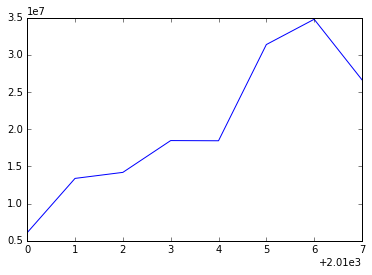

In [135]:
ts.groupby(ts.index.year).sum()['views'].plot()

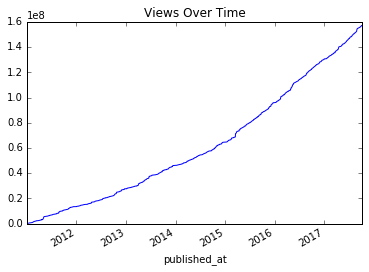

In [140]:
ts.sort_index()['views']['2011':'2017'].cumsum().plot(title='Views Over Time')

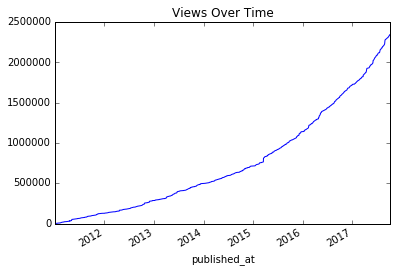

In [141]:
ts.sort_index()['likes']['2011':'2017'].cumsum().plot(title='Views Over Time')

In [179]:
temp = df1[df1.published_at.dt.year==2017]

In [183]:
temp = temp[['published_at','rating']]

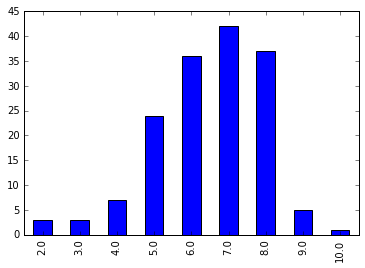

In [195]:
temp.rating.value_counts(sort=False).plot.bar()

In [ ]:
df1[df1.published_at.dt.year==2017][['published_at','rating']].rating.value_counts(sort=False).plot.bar()

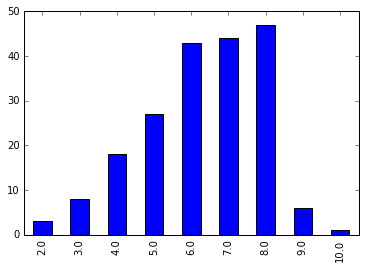

In [204]:
df1[df1.published_at.dt.year==2016][['published_at','rating']].rating.value_counts(sort=False).plot.bar()

In [205]:
df1['year'] = df1.published_at.dt.year

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


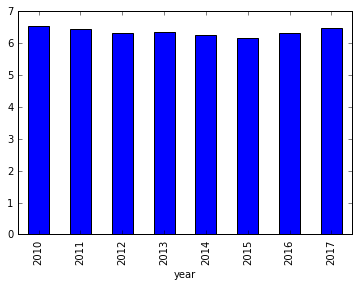

In [207]:
df1.groupby(df1.year)['rating'].mean().plot.bar()

In [209]:
df1.groupby(df1.year)['rating'].var()

year
2010    2.598747
2011    2.555300
2012    2.570961
2013    2.271735
2014    2.486993
2015    2.485127
2016    2.561794
2017    2.174796
Name: rating, dtype: float64

In [216]:
df1[df1.rating==10].groupby(df1.year)['year'].count()

year
2010    3
2012    1
2014    2
2015    1
2016    1
2017    1
Name: year, dtype: int64

In [225]:
df1[(df1.rating==10)&(df1.album.notnull())][['year','title','artist','album']]

,year,title,artist,album
895,2015,Kendrick Lamar - To Pimp A Butterfly ALBUM REVIEW,Kendrick Lamar,To Pimp A Butterfly ALBUM REVIEW
1144,2014,Swans - To Be Kind ALBUM REVIEW,Swans,To Be Kind ALBUM REVIEW
1194,2014,PLANNINGTOROCK - All Love's Legal ALBUM REVIEW,PLANNINGTOROCK,All Love's Legal ALBUM REVIEW
1835,2012,Death Grips- The Money Store ALBUM REVIEW,Death Grips,The Money Store ALBUM REVIEW
2421,2010,Gorillaz- Plastic Beach Review,Gorillaz,Plastic Beach


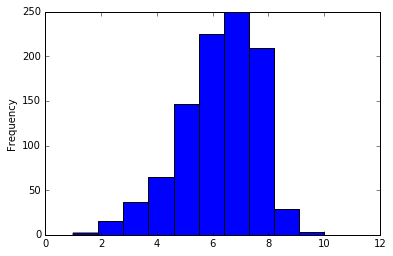

In [59]:
data.rating.plot(kind='hist')

# Model Building

In [52]:
data = df[df.rating.notnull()&df.album.notnull()&df.artist.notnull()]

In [60]:
regModel = linear_model.LinearRegression()

In [69]:
data[['comments','likes','dislikes','favorites','rating']].dtypes

comments       int64
likes        float64
dislikes     float64
favorites      int64
rating       float64
dtype: object

In [63]:
regModel.fit(data[['comments','likes','dislikes','favorites']], data[['rating']])

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
regModel.intercept_

array([ 6.42172187])

In [67]:
regModel.coef_

array([[-0.00039813,  0.0002076 , -0.00050401,  0.        ]])

In [71]:
regModel.score(data[['comments','likes','dislikes','favorites']], data[['rating']])

0.15532445645056192

In [76]:
data['pred'] = regModel.predict(data[['comments','likes','dislikes','favorites']])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
data[['rating','pred']].head()

,rating,pred
1,8.0,6.472785
3,6.0,6.608160
4,7.0,6.474337
7,6.0,6.534127
8,8.0,6.691115


In [78]:
data.rating.describe()

count    981.000000
mean       6.313965
std        1.541037
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: rating, dtype: float64

In [79]:
data.rating.value_counts()

7.0     249
6.0     225
8.0     209
5.0     147
4.0      65
3.0      37
9.0      29
2.0      15
10.0      3
1.0       2
Name: rating, dtype: int64

In [94]:
data['rating_bucket'] = data['rating'].astype('str')

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [98]:
data['rating_bucket'][data.rating.isin([1,2,3])] = "1-3"

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [99]:
data.rating_bucket.value_counts()

7.0     249
6.0     225
8.0     209
5.0     147
4.0      65
1-3      54
9.0      29
10.0      3
Name: rating_bucket, dtype: int64

In [100]:
multReg = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [101]:
multReg.fit(data[['comments','likes','dislikes','favorites']], data[['rating_bucket']])

/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
multReg.coef_

array([[ -5.05031511e-04,  -7.19001309e-04,   1.25457492e-02,
          0.00000000e+00],
       [  1.91261709e-03,   9.47442124e-04,  -2.23837519e-02,
          0.00000000e+00],
       [ -3.32265181e-04,  -7.72314832e-04,   1.23537308e-02,
          0.00000000e+00],
       [ -4.18540291e-04,  -7.88236722e-04,   1.23459109e-02,
          0.00000000e+00],
       [ -5.27918324e-04,  -6.91251014e-04,   1.20058234e-02,
          0.00000000e+00],
       [ -1.01470433e-03,   8.65519800e-06,   7.25557590e-03,
          0.00000000e+00],
       [ -5.04575665e-04,   9.17195430e-04,  -1.02055677e-02,
          0.00000000e+00],
       [  1.39041822e-03,   1.09751113e-03,  -2.39174706e-02,
          0.00000000e+00]])

In [102]:
data['pred'] = multReg.predict(data[['comments','likes','dislikes','favorites']])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
data[['rating_bucket','pred']].head()

,rating_bucket,pred
1,8.0,8.0
3,6.0,7.0
4,7.0,8.0
7,6.0,7.0
8,8.0,8.0
